In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/chest_xray/train'
valid_path = '/content/drive/My Drive/chest_xray/test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('/content/drive/My Drive/chest_xray/train/*')

In [6]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set, 
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
326/326 [==============================] - 3112s 10s/step - loss: 0.1787 - accuracy: 0.9296 - val_loss: 0.2539 - val_accuracy: 0.9199
Epoch 2/5
326/326 [==============================] - 121s 370ms/step - loss: 0.1203 - accuracy: 0.9551 - val_loss: 0.3036 - val_accuracy: 0.9135
Epoch 3/5
326/326 [==============================] - 120s 368ms/step - loss: 0.1512 - accuracy: 0.9484 - val_loss: 0.3961 - val_accuracy: 0.9006
Epoch 4/5
326/326 [==============================] - 119s 364ms/step - loss: 0.0982 - accuracy: 0.9653 - val_loss: 0.3807 - val_accuracy: 0.8990
Epoch 5/5
326/326 [==============================] - 118s 361ms/step - loss: 0.0886 - accuracy: 0.9682 - val_loss: 0.8441 - val_accuracy: 0.8093


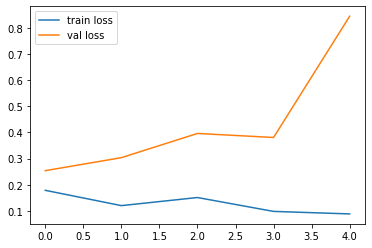

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

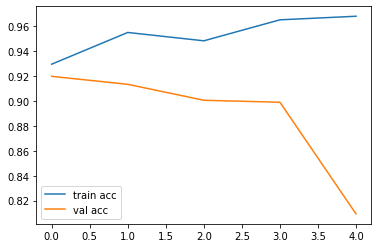

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')